In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# В первой части работы проведем разведочный анализ данных, 
# предоставленных ресурсом airbnb о сдаче жилья внаем в 2019 году в Нью-Йорке. Данные я взяла с ресурса kaggle
data = pd.read_csv('AB_NYC_2019.csv')

In [3]:
# посмотрим, какого типа данные у нас есть для анализа:
data.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [4]:
# видим id, краткое описание, имя владельца, группы районов, районы, координаты, тип жилья, данные о просмотрах и цены. 
# К сожалению, нет данных о площади жилья. Посмотрим, какие типы представлены:
data['room_type'].value_counts() # видим всего три типа, квартира/дом целиком, отдельная комната, место в комнате

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [5]:
# посмотрим, какие группы районов представлены
data['neighbourhood_group'].value_counts()
# 5 групп районов в Нью-Йорке, самое большое количество жилья сдается на Манхэттене и в Бруклине

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [6]:
# прежде чем анализировать цены, оценим, есть ли выбросы:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
# в ценах третий квартиль равен 175 долл, а максимальное значение 10000. Возможно, это реальные цены, но может быть и нет.
#Посмотрим, сколько у нас значений дороже 1000 долл. 
# И сразу исправим значения дешевле 10 долл, поменяем их на среднюю.
data.loc[data['price']<10,'price']=data['price'].mean()
data_high = data[data.price >= 1000]
data_high.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.980000e+02,2.980000e+02,298.000000,298.000000,298.000000,298.000000,298.000000,137.000000,298.000000,298.000000
mean,1.827342e+07,6.512750e+07,40.733120,-73.975689,2188.476510,15.989933,6.835570,0.772117,3.224832,180.208054
std,1.182996e+07,8.024341e+07,0.045796,0.040192,1795.847753,43.720453,15.959855,1.010604,10.171581,152.566805
min,1.749660e+05,8.730000e+03,40.530760,-74.202950,1000.000000,1.000000,0.000000,0.020000,1.000000,0.000000
25%,6.140738e+06,5.966926e+06,40.713738,-73.997478,1100.000000,1.000000,0.000000,0.160000,1.000000,0.000000
50%,1.920942e+07,2.393953e+07,40.735155,-73.982455,1500.000000,2.000000,0.000000,0.380000,1.000000,179.000000
75%,3.013213e+07,1.108150e+08,40.762240,-73.960970,2500.000000,7.000000,6.000000,0.980000,2.000000,361.750000
max,3.631106e+07,2.721663e+08,40.886710,-73.770690,10000.000000,365.000000,121.000000,6.150000,121.000000,365.000000


In [8]:
# для понимания, выбросы ли эти цены, обратим внимание на описания. 
# Проведем анализ наиболее часто встречающихся слов в описании для этих 298 значений.
_names_=[]
#getting name strings from the column and appending it to the list
for name in data_high.name:
    _names_.append(name)
#setting a function that will split those name strings into separate words   
def split_name(name):
    spl=str(name).split()
    return spl
#initializing empty list where we are going to have words counted
_names_for_count_=[]
#getting name string from our list and using split function, later appending to list above
for x in _names_:
    for word in split_name(x):
        word=word.lower()
        _names_for_count_.append(word)

In [9]:
#we are going to use counter
from collections import Counter
#let's see top 25 used words by host to name their listing
_top_25_w=Counter(_names_for_count_).most_common()
_top_25_w=_top_25_w[0:25]

In [10]:
sub_w=pd.DataFrame(_top_25_w)
sub_w.rename(columns={0:'Words', 1:'Count'}, inplace=True)

[Text(0, 0, 'in'),
 Text(0, 0, 'townhouse'),
 Text(0, 0, 'luxury'),
 Text(0, 0, 'bedroom'),
 Text(0, 0, 'loft'),
 Text(0, 0, 'private'),
 Text(0, 0, 'by'),
 Text(0, 0, 'apartment'),
 Text(0, 0, 'park'),
 Text(0, 0, 'the'),
 Text(0, 0, 'village'),
 Text(0, 0, '-'),
 Text(0, 0, 'east'),
 Text(0, 0, 'nyc'),
 Text(0, 0, 'manhattan'),
 Text(0, 0, 'with'),
 Text(0, 0, '2'),
 Text(0, 0, 'for'),
 Text(0, 0, 'of'),
 Text(0, 0, 'west'),
 Text(0, 0, '&'),
 Text(0, 0, 'central'),
 Text(0, 0, 'brooklyn'),
 Text(0, 0, 'beautiful'),
 Text(0, 0, 'airbnb)')]

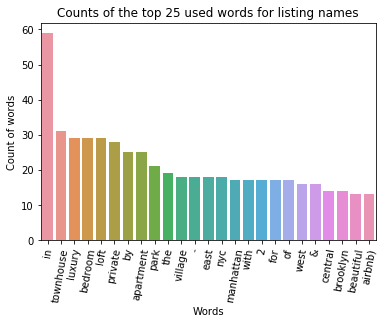

In [11]:
#we are going to use barplot for this visualization
viz_5=sns.barplot(x='Words', y='Count', data=sub_w)
viz_5.set_title('Counts of the top 25 used words for listing names')
viz_5.set_ylabel('Count of words')
viz_5.set_xlabel('Words')
viz_5.set_xticklabels(viz_5.get_xticklabels(), rotation=80)

In [12]:
# наиболее часто встречающиеся слова здесь luxury, townhouse,loft, central park, 
# то есть по крайней мере часть высоких цен явно соответстует реальности
# тогда уберем все дорогие размещения, в описании которых нет этих слов.
data_high_true = data_high[data_high['name'].str.contains('ux|ownhouse|entral|oft')]
data_high_true.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.010000e+02,1.010000e+02,101.000000,101.000000,101.000000,101.000000,101.000000,59.000000,101.000000,101.000000
mean,1.879493e+07,6.408151e+07,40.740601,-73.984887,1948.089109,11.029703,9.049505,0.865932,4.019802,197.683168
std,1.171296e+07,8.611253e+07,0.038504,0.029678,1646.926137,23.837557,15.011580,0.990390,12.252331,145.339735
min,1.749660e+05,8.730000e+03,40.530760,-74.202950,1000.000000,1.000000,0.000000,0.060000,1.000000,0.000000
25%,7.380251e+06,3.655542e+06,40.721380,-73.998370,1000.000000,1.000000,0.000000,0.250000,1.000000,38.000000
50%,1.969817e+07,1.992478e+07,40.736550,-73.986970,1350.000000,2.000000,2.000000,0.510000,1.000000,186.000000
75%,3.053875e+07,1.010802e+08,40.764550,-73.970750,2000.000000,5.000000,11.000000,1.000000,3.000000,362.000000
max,3.631106e+07,2.712487e+08,40.886710,-73.911930,10000.000000,180.000000,95.000000,5.290000,121.000000,365.000000


In [13]:
data_index=data.loc[data['price']>=1000].index
data.drop(data_index,axis=0,inplace=True)

data = data.append(data_high_true)
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.869800e+04,4.869800e+04,48698.000000,48698.000000,48698.000000,48698.000000,48698.000000,38765.000000,48698.000000,48698.000000
mean,1.902123e+07,6.762792e+07,40.728948,-73.952094,144.021293,6.983428,23.345558,1.374574,7.161485,112.544807
std,1.097914e+07,7.861697e+07,0.054553,0.046150,158.275756,20.283814,44.614501,1.681239,33.013096,131.464823
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.476530e+06,7.824337e+06,40.690062,-73.983000,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967809e+07,3.081249e+07,40.723015,-73.955630,105.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.914951e+07,1.074344e+08,40.763130,-73.936160,175.000000,5.000000,24.000000,2.020000,2.000000,226.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [14]:
# теперь сравним цены на жилье по группам районов:
# для этого разобьем наш датасет на пять частей

In [15]:
# Манхэттен
manh = data.loc[data['neighbourhood_group'] == 'Manhattan']
price_manh = manh[['price']]
# Бруклин
broo = data.loc[data['neighbourhood_group'] == 'Brooklyn']
price_broo = broo[['price']]
# Квинс
quee = data.loc[data['neighbourhood_group'] == 'Queens']
price_quee = quee[['price']]
# Бронкс
bron = data.loc[data['neighbourhood_group'] == 'Bronx']
price_bron = bron[['price']]
# Стейтен Айленд
stat = data.loc[data['neighbourhood_group'] == 'Staten Island']
price_stat = stat[['price']]
# все цены
price_total = [price_manh, price_broo, price_quee, price_bron, price_stat]

In [16]:
# создадим таблицу для сравнения статистических данных
stat_info = []
names = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']
for x in price_total:
    i=x.describe()
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    stat_info.append(i)
    
stat_info[0].rename(columns={'price':names[0]}, inplace=True)
stat_info[1].rename(columns={'price':names[1]}, inplace=True)
stat_info[2].rename(columns={'price':names[2]}, inplace=True)
stat_info[3].rename(columns={'price':names[3]}, inplace=True)
stat_info[4].rename(columns={'price':names[4]}, inplace=True)

stat_df=stat_info
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

,Manhattan,Brooklyn,Queens,Bronx,Staten Island
Stats,,,,,
count,21534.000000,20050.000000,5653.000000,1090.000000,371.000000
mean,184.288415,118.667256,94.528038,86.799744,99.258760
std,194.478203,121.317244,71.570674,103.097623,103.098263
min,10.000000,10.000000,10.000000,10.000000,13.000000
25%,95.000000,60.000000,50.000000,45.000000,50.000000
50%,150.000000,90.000000,75.000000,65.000000,75.000000
75%,220.000000,150.000000,110.000000,99.000000,109.000000
max,8500.000000,10000.000000,900.000000,2500.000000,1250.000000


In [17]:
# в таблице видим количество значений, средние, минимальные и максимальные значения, и 25-й, 50-й и 75-й персентили. 
# 50-й персентиль - это медиана.

Text(0.5, 1.0, 'Плотность и распределение цен по каждой группе районов')

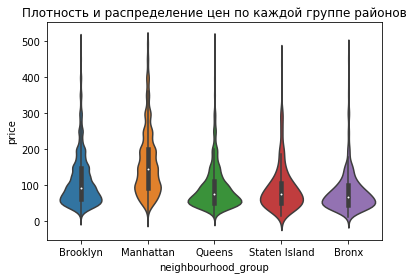

In [18]:
# хотя ранее мы выяснили, что очень высокие значения в основном принадлежат элитному типу жилья и не являются выбросами, 
# тем не менее для визуализации данных предлагаю ограничить цену и оставить размещения дешевле 500 
low_data=data[data.price < 500]
viz_2=sns.violinplot(data=low_data, x='neighbourhood_group', y='price')
viz_2.set_title('Плотность и распределение цен по каждой группе районов')

In [19]:
# смело делаем вывод о том, что дороже всего жилье в Манхеттене, с большим отрывом на втором месте Бруклин, 
# и три остальных района примерно одинаковы

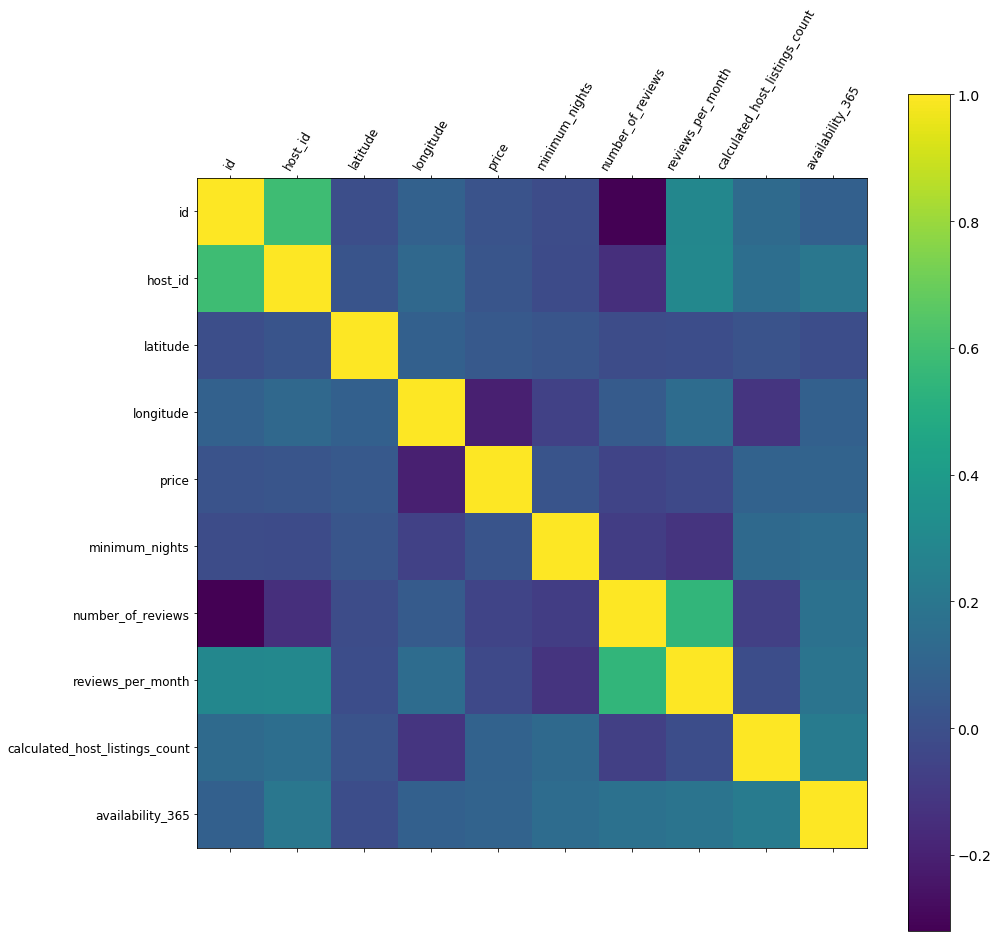

In [20]:
# построим корреляционную матрицу чтобы оценить, есть ли линейная зависимость между показателями
data1 = data.drop(data.columns[[1, 3, 4, 5, 8, 12]], axis='columns')
f = plt.figure(figsize=(15, 15))
plt.matshow(data1.corr(), fignum=f.number)
plt.xticks(range(data1.shape[1]), data1.columns, fontsize=12, rotation=60)
plt.yticks(range(data1.shape[1]), data1.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
#plt.title('Correlation Matrix', fontsize=16);

In [22]:
# видим, что значимых коэффициентов корреляции нет, кроме общего количества просмотров и количества просмотров за месяц, 

In [24]:
# для того, чтобы провести дисперсионный анализ, необходимо, чтобы распределение было нормальным. 
# проверка нормальности возможна тестом Shapiro-Wilk, 
# который проверяет нулевую гипотезу о происхождении данных из нормального распределения.

from scipy import stats
stats.shapiro(price_manh)

C:\Users\marty\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.4671715497970581, 0.0)

In [25]:
# гипотеза не верна, распределение нормальным назвать нельзя, значит и дисперсионный анализ нельзя провести.

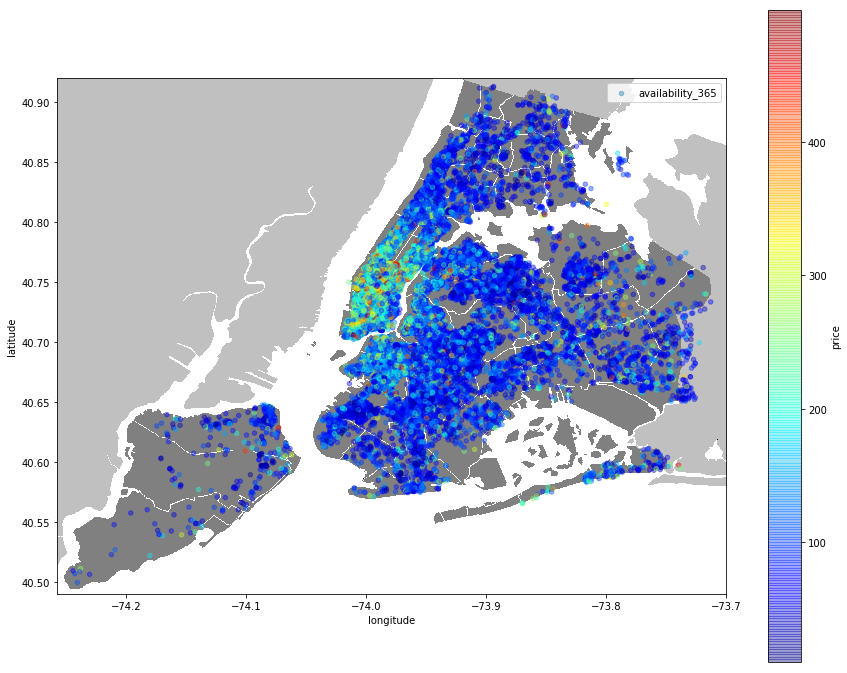

In [28]:
# теперь посмотрим, что можно сделать с координатами. 
#Наложим их на карту Нью-Йорка и оценим еще раз распределение цен в зависимости от района

import urllib
#initializing the figure size
plt.figure(figsize=(15,12))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
low_data.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()

In [29]:
# еще раз подтверждается, что самое дорогое размещение на Манхэттене и находящимся рядом с Манхэттеном районам Бруклина

Итоги анализа.
Мы анализировали данные о стоимости съемного жилья с сайта airbnb. 
Для анализа использовали данные по распределению цены в зависимости от района. 
Нашли и удалили выбросы с нулевыми ценами и с ценами, неоправдано высокими. 
После этого рассчитали статистические показатели по пяти группам районов и отразили это на графике.
В результате выяснили, что дороже всего жилье на Манхэттене, второе место занял Бруклин,
Бронкс, Квинс и Стейтен Айленд приблизительно одинаково дешевы. 
С помощью визуализации на карте, видно более точное распределение дорогого жилья.
Мы построили корреляционную матрицу и выяснили, что линейной зависимости от других числовых показателей у цены нет.
После этого мы проверили гипотезу о нориальности распределения цен на примере цен Манхеттена, 
и выяснили, что нормальным это распределение назвать нельзя. Следовательно дисперсионный анализ мы провести не можем.

В этой работе я использовала некоторые куски кода с других работ в kaggle и оставила некоторые родные комментарии, так они пригодятся мне в дальнейших работах. В частности, я взяла код наложения координат на карту, подсчета слов и визуализации violin по ссылке https://www.kaggle.com/dgomonov/data-exploration-on-nyc-airbnb